In [4]:
import numpy as np
import pandas as pd
import yahoo_fin
import matplotlib.pyplot as plt

In [5]:
from yahoo_fin import stock_info

start_date = '2014-11-01'
end_date = '2021-12-31'

tickers = ['^GSPC',
            'AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB',
            'INTC', 'TSLA', 'NVDA', 'CSCO', 'ORCL']

data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = stock_info.get_data(ticker,
                                        start_date = start_date,
                                        end_date = end_date)['adjclose']

data

,^GSPC,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
2014-11-03,2017.810059,24.623562,41.445259,553.699829,305.720001,73.879997,27.986349,48.518002,4.756350,19.477571,34.636822
2014-11-04,2012.099976,24.443501,41.558830,552.592834,302.809998,75.760002,28.173962,47.785999,4.818585,19.715296,34.761196
2014-11-05,2023.569946,24.502020,41.812187,544.425293,296.519989,74.830002,27.718277,46.194000,4.818585,19.929247,34.903316
2014-11-06,2031.209961,24.572096,42.546043,540.555908,296.640015,75.260002,27.767546,48.243999,4.840129,20.016415,35.365273
2014-11-07,2031.920044,24.642174,42.528568,539.528748,299.859985,75.599998,27.570501,48.040001,4.737199,20.071878,35.480751
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,4725.790039,176.055695,333.999390,2942.850098,3421.370117,335.239990,50.922092,1067.000000,296.349487,61.494038,89.039619
2021-12-27,4791.189941,180.100540,341.743378,2961.280029,3393.389893,346.179993,51.547329,1093.939941,309.397308,62.619656,88.860977
2021-12-28,4786.350098,179.061859,340.545837,2928.959961,3413.219971,346.220001,51.368690,1088.469971,303.168335,62.728268,87.977730
2021-12-29,4793.060059,179.151749,341.244415,2930.090088,3384.020020,342.940002,51.438164,1086.189941,299.958893,63.152836,87.541069


In [6]:
length = len(data['^GSPC'])
returns = data.copy()

for j in range(len(tickers)):
    for i in range(length - 1):
        returns.iloc[i+1, j] = data.iloc[i+1, j]/data.iloc[i,j] - 1

returns = returns.iloc[1:,]
returns

,^GSPC,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
2014-11-04,-0.002830,-0.007313,0.002740,-0.001999,-0.009519,0.025447,0.006704,-0.015087,0.013085,0.012205,0.003591
2014-11-05,0.005700,0.002394,0.006096,-0.014780,-0.020772,-0.012276,-0.016174,-0.033315,0.000000,0.010852,0.004088
2014-11-06,0.003776,0.002860,0.017551,-0.007107,0.000405,0.005746,0.001777,0.044378,0.004471,0.004374,0.013235
2014-11-07,0.000350,0.002852,-0.000411,-0.001900,0.010855,0.004518,-0.007096,-0.004228,-0.021266,0.002771,0.003265
2014-11-10,0.003120,-0.001651,0.004314,0.011978,0.017508,-0.007936,-0.009530,0.007202,0.011622,-0.007106,0.012769
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.006224,0.003644,0.004472,0.001317,0.000184,0.014495,0.006671,0.057619,0.008163,0.012189,-0.001558
2021-12-27,0.013839,0.022975,0.023186,0.006263,-0.008178,0.032633,0.012278,0.025248,0.044028,0.018305,-0.002006
2021-12-28,-0.001010,-0.005767,-0.003504,-0.010914,0.005844,0.000116,-0.003466,-0.005000,-0.020133,0.001734,-0.009940
2021-12-29,0.001402,0.000502,0.002051,0.000386,-0.008555,-0.009474,0.001352,-0.002095,-0.010586,0.006768,-0.004963


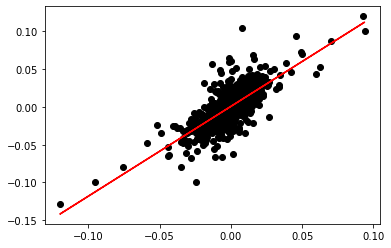

1.1863955659540208 0.0006205386286910549


In [7]:
m, c = np.polyfit(returns['^GSPC'].values, returns['AAPL'].values, 1)
plt.scatter(returns['^GSPC'].values, returns['AAPL'].values, c='k')
plt.plot(returns['^GSPC'].values, m*returns['^GSPC'].values + c, 'r')
plt.show()
print(m,c)

In [11]:
x_mat = np.asmatrix(np.vstack( [np.ones(length-1), np.array(returns['^GSPC'])] ))
x_mat = x_mat.T

beta_OLS = pd.DataFrame(columns=tickers[1:])

for ticker in tickers[1:]:
    y_mat = np.asmatrix(returns[ticker]).T
    tmp_x = np.linalg.inv(np.matmul(x_mat.T, x_mat))
    tmp_x = np.matmul(tmp_x, x_mat.T)

    beta_OLS[ticker] = pd.DataFrame(np.matmul(tmp_x, y_mat))

beta_OLS.index = ['Intercept', 'Slope']
beta_OLS

,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
Intercept,0.000621,0.000659,0.000482,0.000990,0.000459,-0.000113,0.001603,0.001872,0.000209,0.000125
Slope,1.186396,1.199002,1.066418,0.960329,1.091031,1.200333,1.305768,1.517620,1.053835,0.961722


In [9]:
# beta_OLS = pd.DataFrame(columns=tickers[1:])
# beta_OLS.index = ['Intercept', 'Slope']

# for ticker in tickers[1:]:
#     m, c = np.polyfit(returns['^GSPC'].values, returns[ticker].values, 1)
#     beta_OLS[ticker]['Intercept'] = c
#     beta_OLS[ticker]['Slope'] = m

# beta_OLS

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [12]:
intercept = beta_OLS.iloc[0]
slope = beta_OLS.iloc[1]

ranks = pd.DataFrame(intercept.rank(ascending=False))
ranks['Slope'] = pd.DataFrame(slope.rank(ascending=False))
ranks

,Intercept,Slope
AAPL,5.0,5.0
MSFT,4.0,4.0
GOOG,6.0,7.0
AMZN,3.0,10.0
FB,7.0,6.0
INTC,10.0,3.0
TSLA,2.0,2.0
NVDA,1.0,1.0
CSCO,8.0,8.0
ORCL,9.0,9.0


In [ ]:
rolling_window = 225
signals_df = pd.DataFrame(np.zeros((length-rolling_window-1, len(tickers)-1)), columns=tickers[1:])

intercept = pd.Dataframe
for i in range(length-1-rolling_window):
    rolling_rets = returns.iloc[i:i+rolling_window]
    x_mat = np.asmatrix(np.vstack( [np.ones(length-1), np.array(returns['^GSPC'])] ))
    x_mat = x_mat.T
    beta_OLS = pd.DataFrame(columns=tickers[1:])

    for ticker in tickers[1:]:
        y_mat = np.asmatrix(returns[ticker]).T
        tmp_x = np.linalg.inv(np.matmul(x_mat.T, x_mat))
        tmp_x = np.matmul(tmp_x, x_mat.T)
        beta_OLS[ticker] = pd.DataFrame(np.matmul(tmp_x, y_mat))
        
    beta_OLS.index = ['Intercept', 'Slope']
    intercept = beta_OLS.iloc[0]
    slope = beta_OLS.iloc[1]
    ranks = pd.DataFrame(intercept.rank(ascending=False))
    ranks['Slope'] = pd.DataFrame(slope.rank(ascending=False))


In [14]:
signals = np.zeros(len(tickers) - 1)
signals_df = pd.DataFrame
for j in range(len(tickers)-1):
    if ranks.iloc[j,0] <= 2:
        signals[j] = 0.4
    elif ranks.iloc[j,0] >= 9:
        signals[j] - 0.1
    else:
        signals[j] = 0
signals_df.iloc[i,] = signals.tolist()

signals_df

TypeError: 'property' object does not support item assignment

In [ ]:
# ret_mat = np.asmatrix(returns.iloc[])